<a href="https://colab.research.google.com/github/Alebeiruth/deep_learning/blob/main/B1a_Deep_RNN_Simple_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset IMDB**

Dataset com 50000 comentários de filmes. Este é um conjunto de dados para classificação de sentimento binário (Positivo ou Negativo). Há 25000 resenhas de filmes para treinamento e 25000 para teste.

---
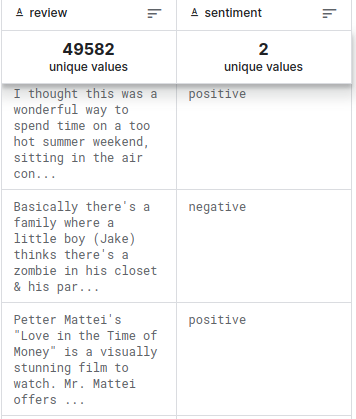

In [ ]:
from keras import layers # módulo com várias classes que são camadas usadas para construir redes neurais
from keras import models #  módulo que contém classes e funções usadas para construir, compilar, treinar e avaliar modelos de redes neurais.
from keras import preprocessing # Módulo de que contém funções para manipular sequências (pre-processamento)
from keras import datasets # Módulo com datasets. Vamos utilizar o dataset imdb, que possui resenhas de filmes já classificadas como positivas ou negativas


# Carregar e pré-processar o dataset IMDB

# Variável em que vou definir o número máximo de palavras consideradas no vocabulário (dataset)
# Apenas as 20000 palavras mais frequentes no dataset serão consideradas
max_words = 20000

# carrego aqui os dados de treinamento e testes, e seus respectivos rótulos
# já defino aqui o número máximo de plavras que vou considerar do dataset
# X_val e Y_val são dados de validação
(X_train, Y_train), (X_val, Y_val) = datasets.imdb.load_data(num_words=max_words)

# Variável que define o comprimento máximo de cada resenha. Se uma resenha tiver mais de 100 palavras, ela será truncada
# se tiver menos, será preenchida (padded) com zeros
maxlen = 100

# Relizo um processamento. As resenhas com menos de 100 palavras serão preenchidas com zero (equalizo o tamanho das resenhas)
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_val = preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Definir o modelo
model = models.Sequential()   # Cria um modelo sequencial em que eu posso adicionar camadas sequencialmente

# Cada palavra é representada por um vetor, chamado de embeddings. Aqui definimos o tamanho desse vetor
# Cada palavra será representada por um vetor de 50 dimensões
embedding_dims = 50

# Adiciona uma camada de embedding ao modelo
# O tamanho do vocabulário (número máximo de palavras)
# A dimensão dos vetores de embedding, ou seja, cada palavra será representada por um vetor de 50 dimensões
model.add(layers.Embedding(max_words, embedding_dims))

# Uma camada de células recorrentes possui unidades em que cada unidade recebe uma entrada e um estado oculto, e produz uma saída
# O número de unidades da camada RNN é definido aqui (64 neste exemplo)
rnn_units = 64

# O SimpleRNN no Keras é uma versão simplificada da RNN original
# Ele implementa uma única camada de células recorrentes onde cada unidade recebe uma entrada e um estado oculto, e produz uma saída
# O número de unidades na camada RNN, definido em rnn_units (64 no exemplo)
# return_sequences=False: Indica que a camada RNN irá retornar apenas a última saída da sequência de entradas,
# em vez de retornar a saída de cada passo da sequência
# defini que a função de ativação será a relu
model.add(layers.SimpleRNN(rnn_units, activation='relu', return_sequences=False))

# return_sequences> quer saida final e não saidas intermediarias de cada passos

#model.add(LSTM(rnn_units, activation='relu', return_sequences=False))

# Durante o treinamento, 30% das unidades da camada anterior serão desativadas (zeradas) aleatoriamente
# Isso é importante para generalização dos resultados.
# em cada atualização para evitar overfitting
# dropout desliga uma quantidade de neuronios (aleatoriedade)
model.add(layers.Dropout(0.3))

# A camada tem uma unidade de saída e usa a função de ativação sigmoide (a saída é binária)
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar o modelo
# Usa a função de perda de entropia cruzada binária, que é adequada para problemas de classificação binária
# Usa o otimizador Adam, que é um método eficiente de otimização estocástica baseado em gradiente
# Avalia a acurácia do modelo durante o treinamento e teste.
#Acurácia" refere-se à proporção de previsões corretas feitas por um modelo em relação ao total de previsões.
# função de perda ou loss são adequadas para especificas situações
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumo do modelo
#model.summary()


In [ ]:
# Treinamento da rede neural
# Treina o modelo com os dados de treinamento X_train e Y_train
# Usa os dados de validação X_val e Y_val para avaliar o modelo após cada época de treinamento
# Executa o treinamento por 10 épocas
# batch_size executa por lotes
# Em cada iteração, processa lotes de 32 amostras, ajustando os pesos do modelo com base nos gradientes calculados a partir da perda
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 2, batch_size = 32)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6260 - loss: 0.6252 - val_accuracy: 0.8214 - val_loss: 0.3970
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8608 - loss: 0.3309 - val_accuracy: 0.7516 - val_loss: 0.5042


In [ ]:
# Função para converter texto em sequência
indice_da_palavra = datasets.imdb.get_word_index()

def text_to_sequence(text):
    palavras = text.lower().split()
    sequencia = []
    for palavra in palavras:
        if palavra in indice_da_palavra and indice_da_palavra[palavra] < max_words:
            sequencia.append(indice_da_palavra[palavra] + 3)  # +3 porque 0, 1 e 2 são reservados para padding, start e unknown tokens
    return preprocessing.sequence.pad_sequences([sequencia], maxlen=maxlen)

# Função para classificar uma resenha
def classify_review(review):
    sequencia = text_to_sequence(resenha)
    prediction = model.predict(sequencia)
    print(f' Predição da rede: {prediction[0][0]}')
    return 'Positiva' if prediction[0][0] > 0.5 else 'Negativa'

# Exemplo de uso
resenha = "This movie was absolutely wonderful, with a great storyline and stellar acting."
classification = classify_review(resenha)
print(f'A resenha é classificada como: {classification}')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
 Predição da rede: 0.5838571786880493
A resenha é classificada como: Positiva
